# Credit Card Fraud Detection - K-Nearest Neighbor(KNN)

## Importing the Dependencies

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [5]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard (1).csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,20000.0,30667.503000,16718.320072,0.000000,36028.000000,38213.000000,40340.000000,47054.000000
V1,20000.0,-0.253597,1.748823,-56.407510,-1.022598,-0.313121,1.137722,1.685314
V2,20000.0,-0.064480,1.617802,-72.715728,-0.629234,0.077129,0.729055,9.628396
V3,20000.0,0.714497,1.099111,-12.988094,0.180830,0.756333,1.379024,4.101716
V4,20000.0,0.094638,1.361425,-4.817064,-0.787382,0.129684,0.995300,16.491217
V5,20000.0,-0.227266,1.296820,-32.092129,-0.872589,-0.277760,0.296713,34.801666
V6,20000.0,0.128136,1.309555,-26.160506,-0.633680,-0.141918,0.515392,21.393069
V7,20000.0,-0.057537,1.097443,-19.399981,-0.572380,-0.041501,0.460257,34.303177
V8,20000.0,0.053137,1.044362,-25.838568,-0.141978,0.079295,0.367142,7.500621
V9,20000.0,-0.094132,1.025356,-7.083169,-0.692651,-0.119674,0.480362,9.272376


In [8]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20000 non-null  int64  
 1   V1      20000 non-null  float64
 2   V2      20000 non-null  float64
 3   V3      20000 non-null  float64
 4   V4      20000 non-null  float64
 5   V5      20000 non-null  float64
 6   V6      20000 non-null  float64
 7   V7      20000 non-null  float64
 8   V8      20000 non-null  float64
 9   V9      20000 non-null  float64
 10  V10     20000 non-null  float64
 11  V11     20000 non-null  float64
 12  V12     20000 non-null  float64
 13  V13     20000 non-null  float64
 14  V14     20000 non-null  float64
 15  V15     20000 non-null  float64
 16  V16     20000 non-null  float64
 17  V17     20000 non-null  float64
 18  V18     20000 non-null  float64
 19  V19     20000 non-null  float64
 20  V20     20000 non-null  float64
 21  V21     20000 non-null  float64
 22

In [9]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

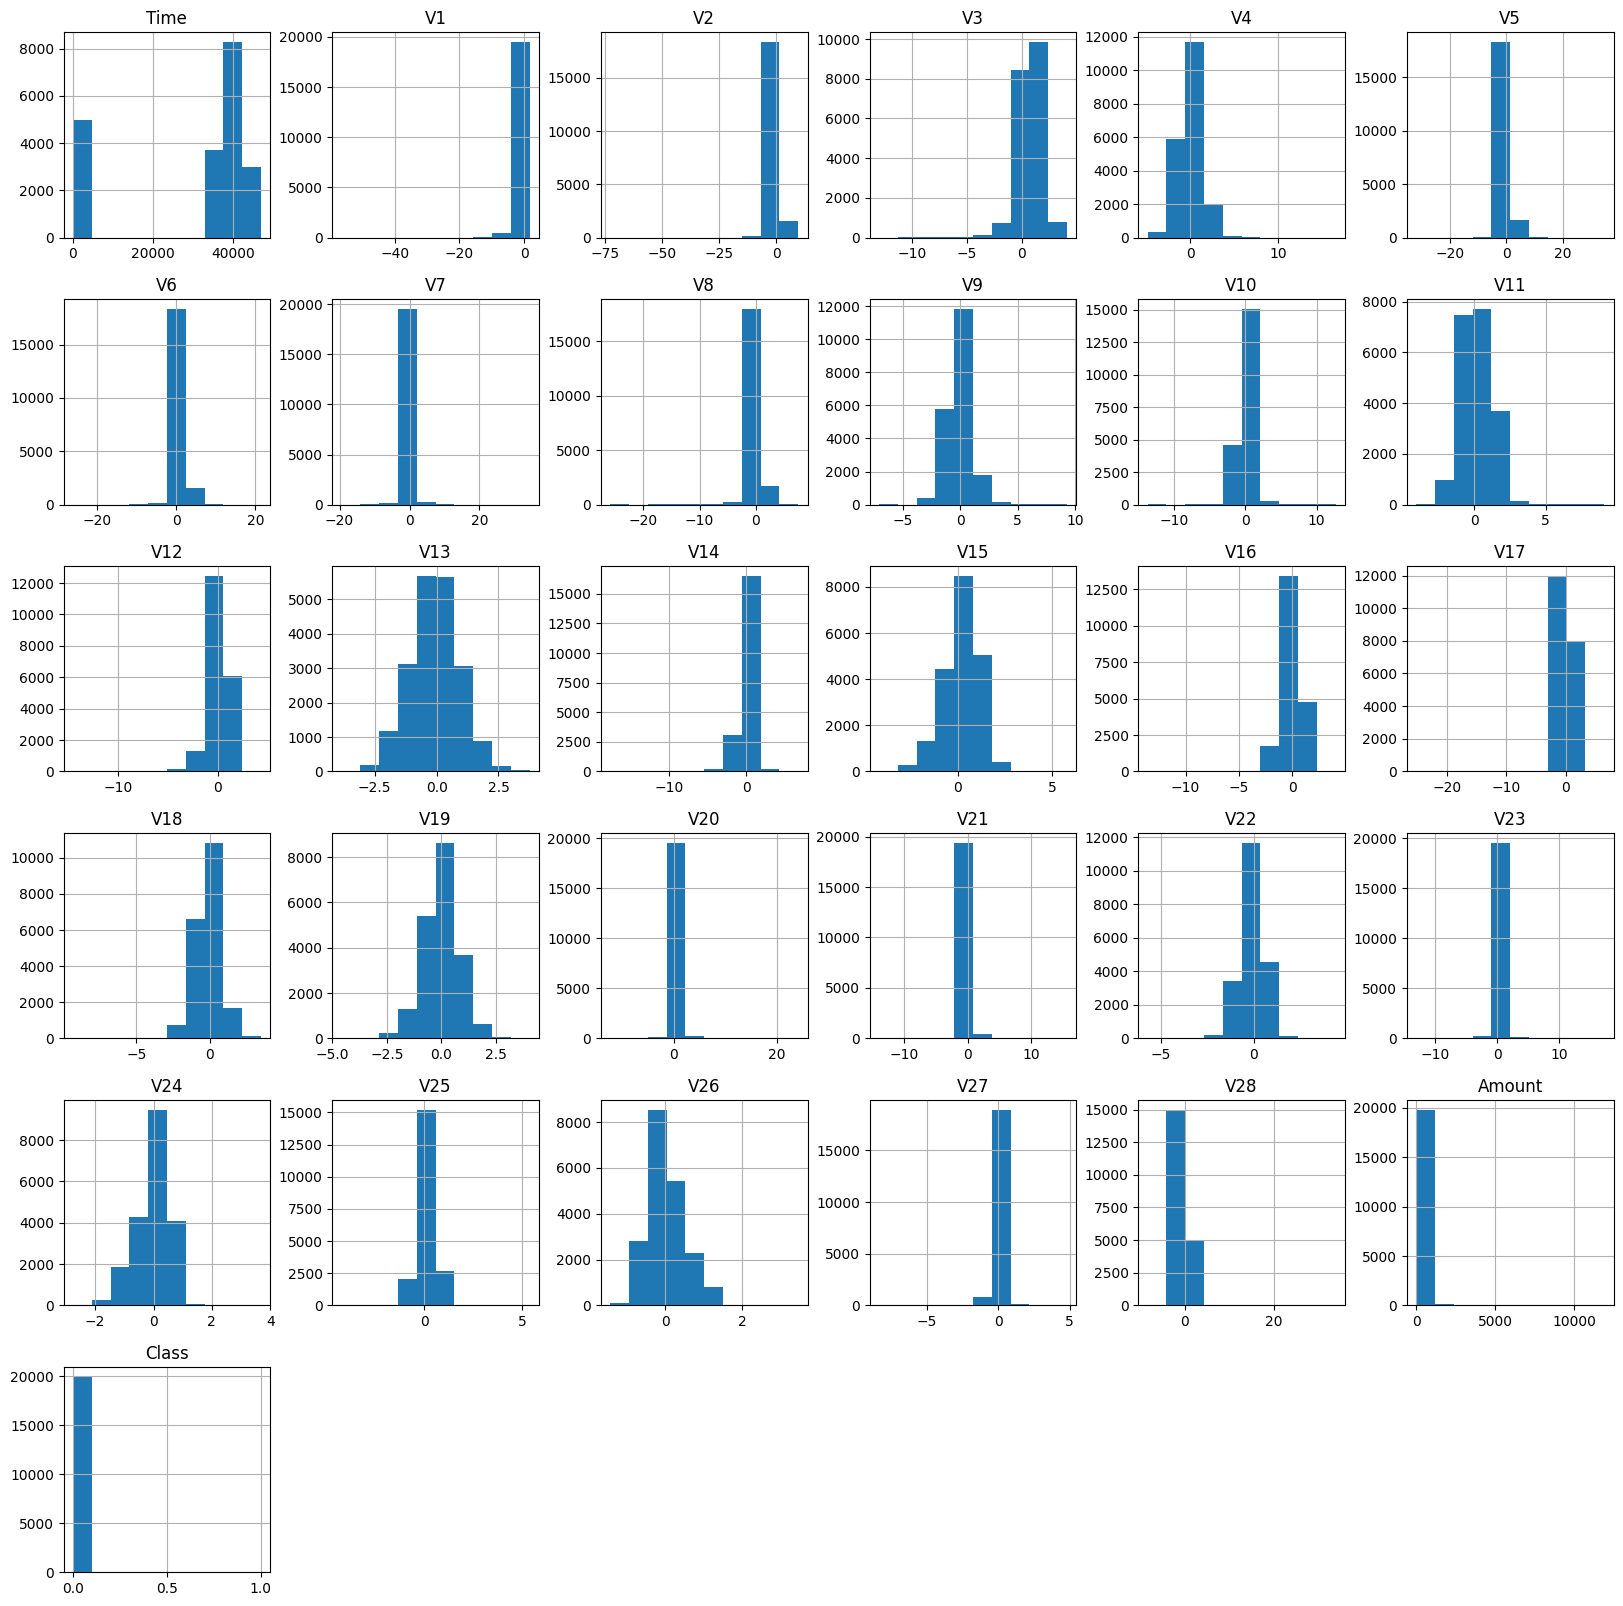

In [10]:
#
credit_card_data.hist(figsize=(20,20))

## standardize the variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:

X = pd.DataFrame(scaler.fit_transform(credit_card_data.drop(["Class"],axis = 1)))
y = credit_card_data.Class

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.834411,-0.632561,-0.005132,1.657609,0.942798,-0.085639,0.255247,0.270759,0.043626,0.446606,...,0.261723,0.003836,0.603791,-0.128789,0.084751,-0.003667,-0.399585,0.338966,-0.070081,0.188357
1,-1.834411,0.826550,0.204375,-0.498612,0.259673,0.221535,-0.160743,-0.019379,0.030607,-0.157308,...,-0.164359,-0.303855,-0.847531,0.237013,-0.592065,0.085886,0.242937,-0.045448,0.020851,-0.368725
2,-1.834351,-0.631730,-0.788549,0.963269,0.209449,-0.212782,1.277079,0.773633,0.186280,-1.385428,...,0.625418,0.398785,1.385806,1.632982,-1.173475,-1.061180,-0.297563,-0.170501,-0.168439,1.056757
3,-1.834351,-0.407527,-0.074638,0.981269,-0.703640,0.167303,0.854561,0.268946,0.310531,-1.260951,...,-0.349093,-0.129631,0.172177,-0.266717,-1.982600,1.199092,-0.466515,0.147932,0.139629,0.089324
4,-1.834291,-0.517295,0.582420,0.759015,0.226530,-0.138749,-0.024600,0.592736,-0.309929,0.889344,...,0.470620,0.017000,1.427926,-0.175402,0.208441,-0.779214,1.010673,0.570528,0.530265,-0.113558


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## Using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test,pred))

[[5982    0]
 [  14    4]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5982
           1       1.00      0.22      0.36        18

    accuracy                           1.00      6000
   macro avg       1.00      0.61      0.68      6000
weighted avg       1.00      1.00      1.00      6000

